# Saffman-Taylor instability

Working in the frame of reference moving at the non-dimensionalised unit velocity $\textbf{e}_U$ of the injected fluid.

initial-boundary value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\phi\frac{\partial c}{\partial t} + \textbf{u}\cdot\nabla c = \frac{1}{Pe}\nabla\cdot(\mathsf{D}\cdot\nabla c)$$

$$\nabla\cdot\textbf{u}=0$$

$$\textbf{u}=-\frac{\mathsf{K}}{\mu}\cdot(\nabla p + \mu\mathsf{K}^{-1}\cdot\textbf{e}_U)$$

mapping to porous convection equations defined in `demo/py/porous_convection.py`

$$
\begin{Bmatrix}
\phi \\
Ra \\ 
\mathsf{D} \\
\mathsf{K} \\
\mu \\
\rho \\ 
\textbf{e}_g 
\end{Bmatrix}
\mapsto
\begin{Bmatrix}
\phi \\
Pe \\ 
\mathsf{D} \\
\mathsf{K} \\
\mu \\
\mu \\
\mathsf{K}^{-1}\cdot\textbf{e}_U
\end{Bmatrix}
$$

## Example: $d=2$ rectangle

horizontal rectangle
$$\Omega = [-L_x/2, L_x/2] \times [0, L_y]$$
$$\textbf{e}_U=\textbf{e}_x$$

constitutive relations
$$
\begin{align*}
\phi &= 1 \\
\mathsf{D} &= \mathsf{I} \\ 
\mathsf{K} &= \mathsf{I}\\ 
\mu(c) &= \exp(-\Lambda c) \\
\end{align*}
$$

initial condition

$$c_0(x,y)=\lim_{\epsilon\to0}\frac{1}{2}\left(1+\text{erf}\left(-\frac{x}{\epsilon L_x}\right)\right)+\mathcal{N}(x,y)$$

## Periodic boundary conditions

periodic concentration

$$c(x=-\tfrac{1}{2}L_x,y)=c(x=\tfrac{1}{2}L_x,y)$$

$$c(x,y=0)=c(x,y=L_y)$$

periodic normal velocity

$$u_x(x=-\tfrac{1}{2}L_x,y)=u_x(x=\tfrac{1}{2}L_x,y)$$

$$\implies \psi(x=-\tfrac{1}{2}L_x,y)=\psi(x=\tfrac{1}{2}L_x,y)$$

$$u_y(x,y=0)=u_y(x,y=L_y)$$

$$\implies\psi(x,y=0)=\psi(x,y=L_y)$$

## Non-periodic boundary conditions

Requires sufficiently large $L_x$ for the effect of the left and right boundaries to be negligible.

prescribed concentration on inflow and outflow boundaries

$$c(x=-\tfrac{1}{2}L_x,y)=1$$

$$c(x=\tfrac{1}{2}L_x,y)=0$$

no-flux on upper and lower boundaries

$$\frac{\partial c}{\partial y}\bigg\vert_{x,y=0}=\frac{\partial c}{\partial y}\bigg\vert_{x,y=L_y}=0$$

inflow on left boundary (working in the frame of reference of injected fluid)

$$\textbf{n}\cdot\textbf{u}\vert_{x=-L_x/2,y}=0$$

outflow on right boundary (working in the frame of reference of injected fluid)

$$\textbf{n}\cdot\textbf{u}\vert_{x=L_x/2,y}=0$$

no-penetration on upper and lower boundaries

$$\textbf{n}\cdot\textbf{u}\vert_{x,y=0}=\textbf{n}\cdot\textbf{u}\vert_{x,y=L_y}=0$$

no-penetration on entire boundary 

$$\textbf{n}\cdot\textbf{u}\vert_{\partial\Omega}=0\implies\psi\vert_{\partial\Omega}=0$$

In [1]:
from lucifex.fdm import AB2, CN
from lucifex.sim import integrate
from lucifex.viz import plot_colormap
from lucifex.io import write

from py.saffman_taylor import saffman_taylor_rectangle


simulation = saffman_taylor_rectangle(
    Lx=2.0,
    Ly=1.0,
    Nx=160,
    Ny=80,
    cell='quadrilateral', 
    Pe=200.0,
    Lmbda=5.0, 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

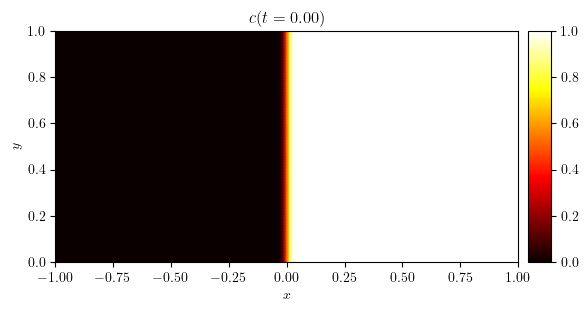

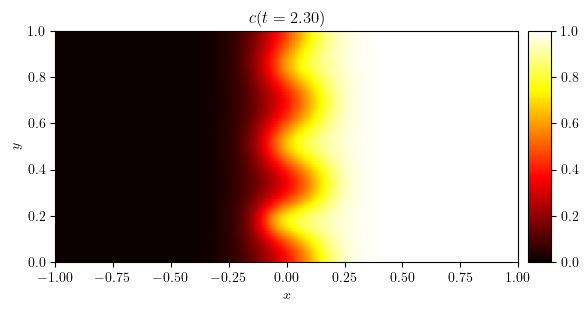

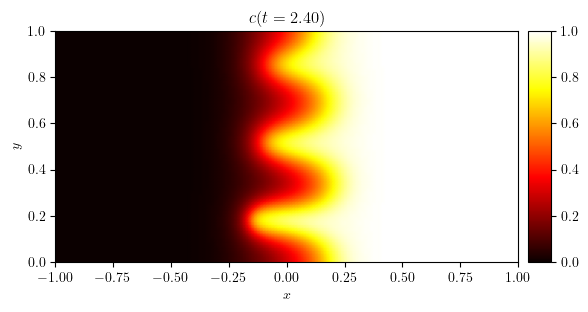

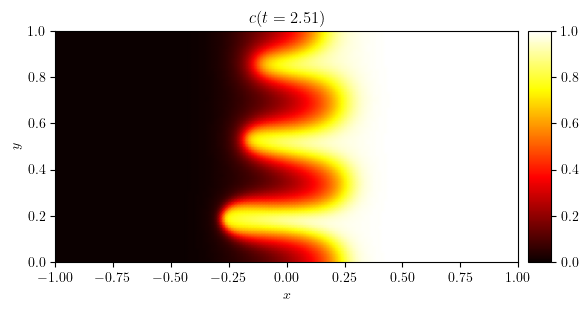

In [ ]:
c, psi = simulation['c', 'psi']

i_qrt = int(0.25 * len(c.series))
i_mid = int(0.5 * len(c.series))
time_indices = (0, i_qrt, i_mid, -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    write(
        fig, 
        f'A20_saffman_taylor_c(t={c.time_series[i]:.2f})', 
        './figures', 
        file_ext=['pdf', 'png'], 
        close=False, 
        pickle=False,
    )